### This data was taken from Analytic vidhya
* My client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

###### 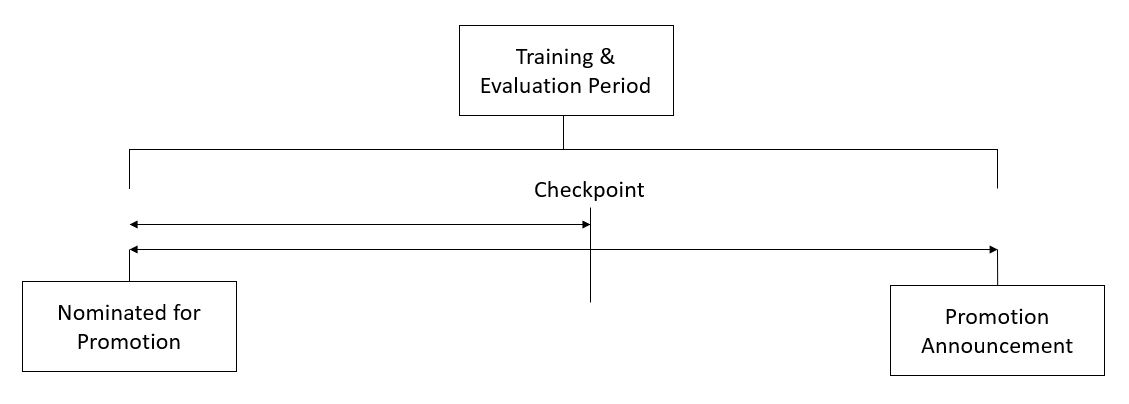

* They first identify a set of employees based on recommendations/ past performance
* Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
* At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
* For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
* They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Lenovo\OneDrive\Documents\python files\capstone project models"

C:\Users\Lenovo\OneDrive\Documents\python files\capstone project models


In [3]:
train=pd.read_csv("HR train_LZdllcl.csv")

In [4]:
test=pd.read_csv("HR test_2umaH9m.csv")

In [5]:
train.shape

(54808, 14)

In [6]:
test.shape

(23490, 13)

In [7]:
# In HR Analytics data then have given both test and train data 

In [8]:
# In this HR analytics data i have dropped Employee ID in both test and train data because it is a unique ID 

In [9]:
train=train.drop(['employee_id'],axis=1)

In [10]:
test=test.drop(['employee_id'],axis=1)

## By using info we can see the null values and dtypes 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


## Using describe we can get mean median and min-max quartile's standard deviation for numeric variables

In [12]:
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
test.shape

(23490, 12)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [15]:
test.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [16]:
train.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
test.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

## Here in the data set we have missing values so i have used knn imputation algorithm

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Before using knn algorithm we should do label encoding to the entire data so the knn will work

In [20]:
combine=pd.concat([train,test],axis=0)

In [21]:
test['is_promoted']='test'

In [22]:
stringcols=combine.astype(str).apply(lambda series:pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
                                                               index=series[series.notnull()].index))

# In above code the label encoder will do label encode to the oberservations present in the data not for the missing values
#.astype(str),if you want to convert entire column to type string
# The apply method calls lambda function, and applies the computation to each row of the data frame. 
#Besides, apply can also do the modification for every column in the data frame. 
#In that case, specify one more argument as axis = 0 in the apply function
#the pd.apply(lambda series:) applies a function which returns pd.Series to each column; 
#so, it returns a dataframe with a new values.
# Series.notnull is an alias for Series.notna.Detect existing (non-missing) values

In [23]:
stringcols # So after label encoding data has converted into 0's and 1's 

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,0,15,4,33,1,0,10,0
1,4,14,0,1,0,0,10,4,29,0,0,21,0
2,7,10,0,1,2,0,14,2,32,0,0,11,0
3,7,15,0,1,0,2,19,0,1,0,0,11,0
4,8,18,0,1,0,0,25,2,11,0,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,0,4,2,0,0,0,22,2
23486,8,17,0,1,2,0,11,2,32,0,0,35,2
23487,2,7,0,0,2,0,6,3,29,0,0,11,2
23488,5,24,0,1,2,3,7,5,0,0,0,31,2


In [24]:
from sklearn.impute import KNNImputer

In [25]:
knn=KNNImputer()

In [26]:
stringcolsimp=knn.fit_transform(stringcols)

In [27]:
stringcolsimp=pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [28]:
stringcolsimp.shape

(78298, 13)

In [29]:
stringcolsimp.isnull().sum().sort_values(ascending=False)

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [30]:
# Split Data into train and test
hrtrain=stringcolsimp.loc[0:54807]
hrtest=stringcolsimp[54808:78298]

In [31]:
hrtrain.shape

(54808, 13)

In [32]:
hrtest.shape

(23490, 13)

### Now data was cleaned and doing some exploratory data analysis

<AxesSubplot:ylabel='Frequency'>

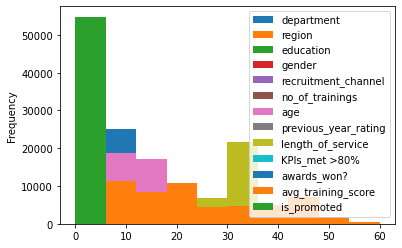

In [33]:
hrtrain.plot(kind='hist')

<AxesSubplot:>

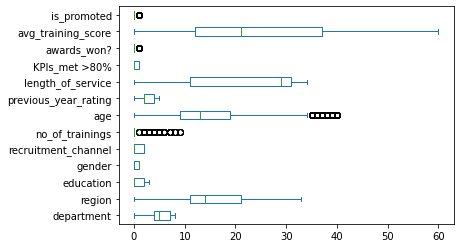

In [34]:
hrtrain.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

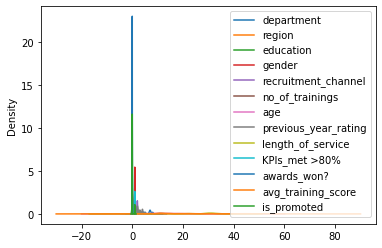

In [35]:
hrtrain.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

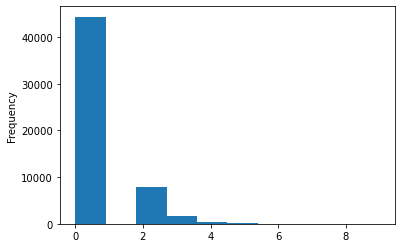

In [36]:
hrtrain.no_of_trainings.plot(kind='hist')

<AxesSubplot:>

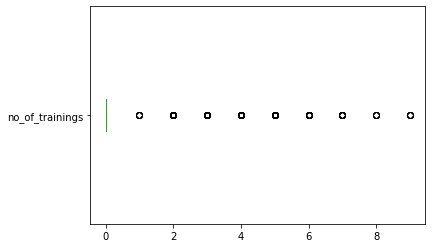

In [37]:
hrtrain.no_of_trainings.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

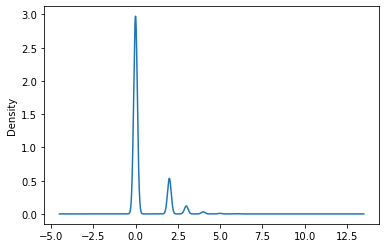

In [38]:
hrtrain.no_of_trainings.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

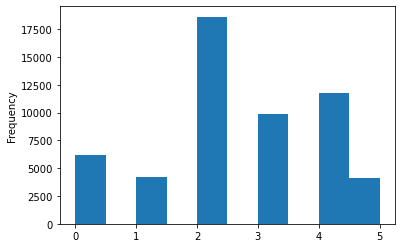

In [39]:
hrtrain.previous_year_rating.plot(kind='hist')

<AxesSubplot:>

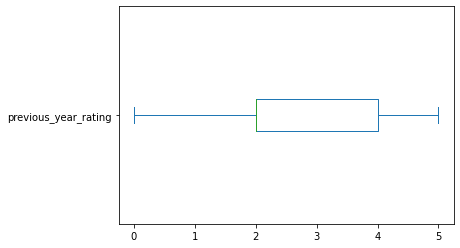

In [40]:
hrtrain.previous_year_rating.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

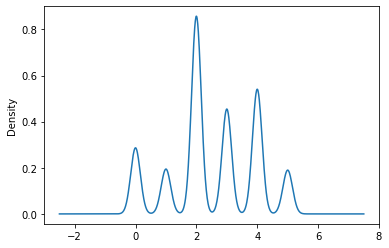

In [41]:
hrtrain.previous_year_rating.plot(kind='density')

### After cleaning the data now doing the hypothesis testing on the data

### Hypothesis testing

### Test Null Average length_of_service of is_promoted equal ?

In [42]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0.0    20.981492
1.0    21.061482
Name: length_of_service, dtype: float64

In [43]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).var()

is_promoted
0.0    142.926601
1.0    143.083213
Name: length_of_service, dtype: float64

In [44]:
N=hrtrain[hrtrain.is_promoted==0]

In [45]:
Y=hrtrain[hrtrain.is_promoted==1]

In [46]:
from scipy.stats import ttest_ind

In [47]:
ttest_ind(N.length_of_service,Y.length_of_service,equal_var=False) # P-value is greater than 0.05 and non-significant
                                                                   # fail to reject null hypothesis both means are treated equal

Ttest_indResult(statistic=-0.43701920841935704, pvalue=0.662114356290548)

### Test Null Average avg_training_score of male and female equal ?

In [48]:
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
0.0    24.889897
1.0    24.173550
Name: avg_training_score, dtype: float64

In [49]:
hrtrain.avg_training_score.groupby(hrtrain.gender).var()

gender
0.0    140.798373
1.0    194.751877
Name: avg_training_score, dtype: float64

In [50]:
F=hrtrain[hrtrain.gender==0]

In [51]:
M=hrtrain[hrtrain.gender==1]

In [52]:
ttest_ind(F.avg_training_score,M.avg_training_score,equal_var=False)  # P-value is less than 0.05 and there is significant 
                                                                     # difference between avg_training_score and gender
                                                                 # reject null hypothesis both means cannot be treated equal

Ttest_indResult(statistic=6.122262326710493, pvalue=9.321257169457923e-10)

### Test Null Average length_of_service of different recruitment_channel equal?

In [53]:
from scipy.stats import f_oneway

In [54]:
hrtrain.length_of_service.groupby(hrtrain.recruitment_channel).mean()

recruitment_channel
0.0    21.016850
1.0    20.638354
2.0    20.968088
Name: length_of_service, dtype: float64

In [55]:
hrtrain.length_of_service.groupby(hrtrain.recruitment_channel).var()

recruitment_channel
0.0    142.925944
1.0    145.219667
2.0    142.846090
Name: length_of_service, dtype: float64

In [56]:
O=hrtrain[hrtrain.recruitment_channel==0]
R=hrtrain[hrtrain.recruitment_channel==1]
S=hrtrain[hrtrain.recruitment_channel==2]

In [57]:
f_oneway(O.length_of_service,R.length_of_service,S.length_of_service)   # P-value is greater than 0.05 and non-significant
                                                                   # fail to reject null hypothesis both means are treated equal

F_onewayResult(statistic=0.6091857390381537, pvalue=0.5437971608307719)

### Test Null Average avg_training_score of different education equal?

In [58]:
hrtrain.avg_training_score.groupby(hrtrain.education).mean()

education
0.0    24.422046
1.0    25.925466
2.0    25.061240
3.0    19.156496
Name: avg_training_score, dtype: float64

In [59]:
hrtrain.avg_training_score.groupby(hrtrain.education).var()

education
0.0    178.633152
1.0    126.561602
2.0    174.763202
3.0    192.995017
Name: avg_training_score, dtype: float64

In [60]:
ba=hrtrain[hrtrain.education==0]
bs=hrtrain[hrtrain.education==1]
ma=hrtrain[hrtrain.education==2]
ot=hrtrain[hrtrain.education==3]

In [61]:
f_oneway(ba.avg_training_score,bs.avg_training_score,ma.avg_training_score,ot.avg_training_score)  # P-value is less than 0.05 
                                                                                  # and there is significant 
                                                                     # difference between avg_training_score and education
                                                                 # reject null hypothesis both means cannot be treated equal

F_onewayResult(statistic=140.21336901584613, pvalue=1.6641189093926441e-90)

### Test Null No Association between is_promoted and gender
* Here is_promoted and gender is in categricial data so we have used chi_square 

In [62]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,0.0,1.0
is_promoted,,
0.0,14845,35295
1.0,1467,3201


In [63]:
from scipy.stats import chi2_contingency

In [64]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))  # P-value is greater than 0.05 
                                                                   # and there is no association between both variables 

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

### Test Null No Association between education and recruitment_channel?
* Here education and recruitment_channel is in categricial data so we have used chi_square test

In [65]:
pd.crosstab(hrtrain.education,hrtrain.recruitment_channel)

recruitment_channel,0.0,1.0,2.0
education,,,
0.0,20251,883,15535
1.0,418,39,348
2.0,8392,212,6321
3.0,1385,8,1016


In [66]:
chi2_contingency(pd.crosstab(hrtrain.education,hrtrain.recruitment_channel))     # P-value is less than 0.05 
                                                                   # and there is association between both variables

(120.5761969645995,
 1.2332451261176682e-23,
 6,
 array([[2.03697339e+04, 7.64049007e+02, 1.55352171e+04],
        [4.47179791e+02, 1.67732813e+01, 3.41046927e+02],
        [8.29087998e+03, 3.10982886e+02, 6.32313713e+03],
        [1.33820636e+03, 5.01948256e+01, 1.02059882e+03]]))

In [67]:
hrtest=hrtest.drop(['is_promoted'],axis=1)

In [68]:
hrtest.shape

(23490, 12)

## Model building 

### I have seperated my dependent variable as y and independent variable as x

In [69]:
y=hrtrain.is_promoted

In [70]:
x=hrtrain.drop(['is_promoted'],axis=1)

## In this data dependent variable has imbalance data so here i have done oversampling by using smote technique 

In [71]:
hrtrain.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

## So i have balanced the data using Synthetic Minority Oversampling Technique method and used classification model

* Synthetic Minority Oversampling Technique
* Smote uses KNN methodology (Euclidean distance) and create Synthetic or artificial data that lies within thedata range and      will not not create outliers
* SMOTE also used Random number generator for randomly selecting weights in the range of 0's and 1's
* SMOTENC used for continues and categorical features

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smote=SMOTE(random_state=42)

In [74]:
x_smote,y_smote=smote.fit_resample(x,y)

In [75]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

is_promoted
0.0            50140
1.0             4668
dtype: int64
is_promoted
0.0            50140
1.0            50140
dtype: int64


### In this data dependent variable is in binary so i have to use classification model 

## LogisticRegression 

####  It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. 

* y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))
* Where:
* x is the input value
* y is the predicted output
* b0 is the bias or intercept term
* b1 is the coefficient for the single input value (x)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
le=LogisticRegression(max_iter=500)

In [78]:
logitsmote=le.fit(x_smote,y_smote)

In [79]:
logitsmote.score(x_smote,y_smote)

0.7370961308336658

In [80]:
smotepredlog=logitsmote.predict(x_smote)

In [81]:
pd.crosstab(y_smote,smotepredlog)

col_0,0.0,1.0
is_promoted,,
0.0,35936,14204
1.0,12160,37980


In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(logitsmote,x_smote,y_smote)

array([0.72566813, 0.73947946, 0.73638811, 0.73928002, 0.74326885])

In [84]:
np.mean(cross_val_score(logitsmote,x_smote,y_smote))

0.7368169126445951

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_smote,smotepredlog))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     50140
         1.0       0.73      0.76      0.74     50140

    accuracy                           0.74    100280
   macro avg       0.74      0.74      0.74    100280
weighted avg       0.74      0.74      0.74    100280



In [87]:
from sklearn.metrics import plot_roc_curve

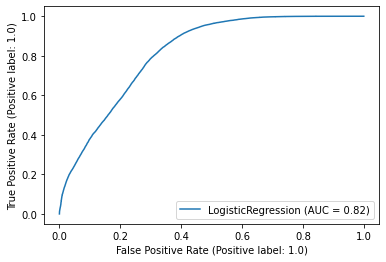

In [88]:
plot_roc_curve(logitsmote,x_smote,y_smote)

In [89]:
testpredict=logitsmote.predict(hrtest)

In [90]:
pd.DataFrame(testpredict).to_csv("udaylogreg.csv")

## Decision Tree

* Decision Trees are flowchart-like tree structures of all the possible solutions to a decision, based on certain conditions. It is called a decision tree as it starts from a root and then branches off to a number of decisions just like a tree.
* The tree starts from the root node where the most important attribute is placed. The branches represent a part of entire     decision and each leaf node holds the outcome of the decision.
* Decision tree splitting will done in two types.
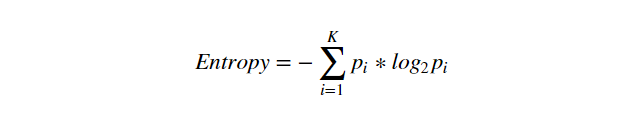
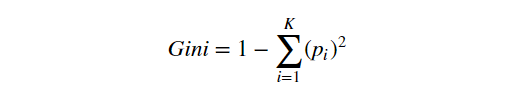

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtreesmote=DecisionTreeClassifier(max_depth=8)

In [93]:
dtmodel=dtreesmote.fit(x_smote,y_smote)

In [94]:
dtmodel.score(x_smote,y_smote)

0.8764658954926207

In [95]:
dtpredict=dtmodel.predict(x_smote)

In [96]:
pd.crosstab(y_smote,dtpredict)

col_0,0.0,1.0
is_promoted,,
0.0,45150,4990
1.0,7398,42742


In [97]:
print(classification_report(y_smote,dtpredict))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     50140
         1.0       0.90      0.85      0.87     50140

    accuracy                           0.88    100280
   macro avg       0.88      0.88      0.88    100280
weighted avg       0.88      0.88      0.88    100280



In [98]:
cross_val_score(dtreesmote,x_smote,y_smote)

array([0.74890307, 0.89314918, 0.88736538, 0.8927503 , 0.89354807])

In [99]:
np.mean(cross_val_score(dtreesmote,x_smote,y_smote))

0.8630534503390507

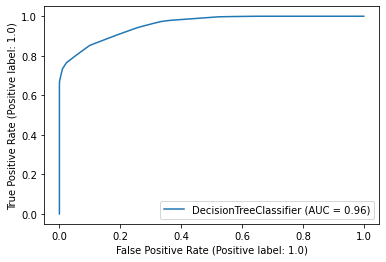

In [100]:
plot_roc_curve(dtreesmote,x_smote,y_smote)

In [101]:
testpredict1=dtreesmote.predict(hrtest)

In [102]:
pd.DataFrame(testpredict1).to_csv("udaydtreg.csv")

## Random forest

* Random Forest Classifier is ensemble algorithm. In next one or two posts we shall explore such algorithms. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects.
* Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfsmote=RandomForestClassifier(max_depth=6,n_estimators=6)

In [105]:
rfmodel=rfsmote.fit(x_smote,y_smote)

In [106]:
rfmodel.score(x_smote,y_smote)

0.8515157558835261

In [107]:
rfpre=rfmodel.predict(x_smote)

In [108]:
cross_val_score(rfmodel,x_smote,y_smote)

array([0.77143997, 0.86083965, 0.84767651, 0.87599721, 0.84348823])

In [109]:
np.mean(cross_val_score(rfmodel,x_smote,y_smote))

0.8361986437973673

In [110]:
pd.crosstab(y_smote,rfpre)

col_0,0.0,1.0
is_promoted,,
0.0,39845,10295
1.0,4595,45545


In [111]:
print(classification_report(y_smote,rfpre))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     50140
         1.0       0.82      0.91      0.86     50140

    accuracy                           0.85    100280
   macro avg       0.86      0.85      0.85    100280
weighted avg       0.86      0.85      0.85    100280



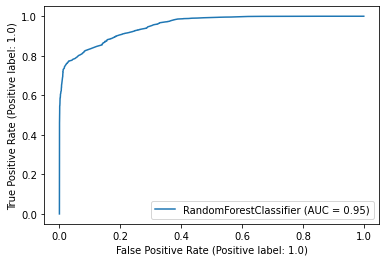

In [112]:
plot_roc_curve(rfmodel,x_smote,y_smote)

In [113]:
testpredict2=rfsmote.predict(hrtest)

In [114]:
pd.DataFrame(testpredict2).to_csv("udayrfreg.csv")

## Gradient Boosting method

* Gradient boosting classifier is a set of machine learning algorithms that include several weaker models to combine them into a strong big one with highly predictive output. Models of a kind are popular due to their ability to classify datasets effectively.
* Gradient boosting classifier usually uses decision trees in model building.
* Classification is a process, where the machine learning algorithm is given some data and puts it into discrete classes. These classes are unique per each data and are categorized accordingly.


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
gbmsmote=GradientBoostingClassifier()

In [117]:
gbmmodel=gbmsmote.fit(x_smote,y_smote)

In [118]:
gbmmodel.score(x_smote,y_smote)

0.9365376944555245

In [119]:
gbmpre=gbmmodel.predict(x_smote)

In [120]:
cross_val_score(gbmmodel,x_smote,y_smote)

array([0.77577782, 0.96649382, 0.96943558, 0.96838851, 0.97043279])

In [121]:
#np.mean(cross_val_score(gbmmodel,x_smote,y_smote))

In [122]:
pd.crosstab(y_smote,gbmpre)

col_0,0.0,1.0
is_promoted,,
0.0,49341,799
1.0,5565,44575


In [123]:
print(classification_report(y_smote,gbmpre))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     50140
         1.0       0.98      0.89      0.93     50140

    accuracy                           0.94    100280
   macro avg       0.94      0.94      0.94    100280
weighted avg       0.94      0.94      0.94    100280



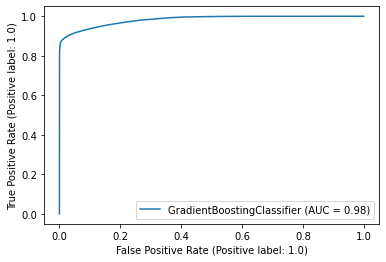

In [124]:
plot_roc_curve(gbmmodel,x_smote,y_smote)

In [125]:
testpredict3=gbmsmote.predict(hrtest)

In [126]:
pd.DataFrame(testpredict3).to_csv("udaygbmreg.csv")

## Support Vector Machine

* The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
* To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


In [127]:
from sklearn.svm import SVC

In [128]:
svmsmote=SVC()

In [129]:
svmmodel=svmsmote.fit(x_smote,y_smote)

In [130]:
svmmodel.score(x_smote,y_smote)

0.7664439569206223

In [131]:
svmpre=svmmodel.predict(x_smote)

In [132]:
cross_val_score(svmmodel,x_smote,y_smote)

array([0.75722976, 0.76700239, 0.76386119, 0.76386119, 0.76974471])

In [133]:
#np.mean(cross_val_score(svmmodel,x_smote,y_smote))

In [134]:
pd.crosstab(y_smote,svmpre)

col_0,0.0,1.0
is_promoted,,
0.0,33997,16143
1.0,7278,42862


In [135]:
print(classification_report(y_smote,svmpre))

              precision    recall  f1-score   support

         0.0       0.82      0.68      0.74     50140
         1.0       0.73      0.85      0.79     50140

    accuracy                           0.77    100280
   macro avg       0.78      0.77      0.76    100280
weighted avg       0.78      0.77      0.76    100280



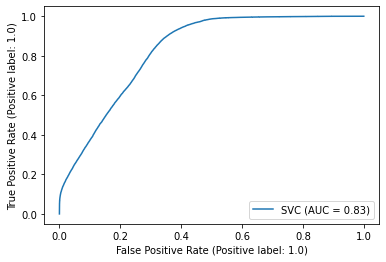

In [136]:
plot_roc_curve(svmmodel,x_smote,y_smote)

In [137]:
testpredict4=svmsmote.predict(hrtest)

In [138]:
pd.DataFrame(testpredict4).to_csv("udaysvmreg.csv")

## Naive Bayes

* Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
* It is mainly used in text classification that includes a high-dimensional training dataset.
* Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
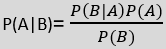

In [139]:
from sklearn.naive_bayes import BernoulliNB

In [140]:
nbsmote=BernoulliNB()

In [141]:
nbmodel=nbsmote.fit(x_smote,y_smote)

In [142]:
nbmodel.score(x_smote,y_smote)

0.7914938173115277

In [143]:
nbpre=nbmodel.predict(x_smote)

In [144]:
cross_val_score(nbmodel,x_smote,y_smote)

array([0.74695852, 0.80384922, 0.79627044, 0.80150578, 0.80604308])

In [145]:
#np.mean(cross_val_score(nbmodel,x_smote,y_smote))

In [146]:
pd.crosstab(y_smote,nbpre)

col_0,0.0,1.0
is_promoted,,
0.0,36560,13580
1.0,7329,42811


In [147]:
print(classification_report(y_smote,nbpre))

              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78     50140
         1.0       0.76      0.85      0.80     50140

    accuracy                           0.79    100280
   macro avg       0.80      0.79      0.79    100280
weighted avg       0.80      0.79      0.79    100280



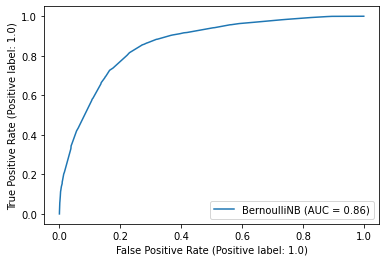

In [148]:
plot_roc_curve(nbmodel,x_smote,y_smote)

In [149]:
testpredict5=nbsmote.predict(hrtest)

In [150]:
pd.DataFrame(testpredict5).to_csv("udaynbreg.csv")

# Final report

In [151]:
report=pd.read_excel("udAY.xlsx")

In [152]:
report

,Model Building,Score,Confusion Matrix Type-2 Error,Analytics Vidhya Score
0,Logistic Regression,0.73,12160,0.300336
1,Decision Tree,0.87,7398,0.344795
2,Random Forest,0.84,4773,0.294828
3,Gradient Boosting,0.93,5565,0.357709
4,Support Vector Machine,0.76,7278,0.302680
5,Navie Bayes,0.79,7329,0.291143


### My final conclusion was i have taken this data from Analytics vidhya so i have submitted my test data in it and i have compared it with to other probability score and Gradient boosting method was the best score.